In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [38]:
import os
os.environ['OS_NUM_Threads']='1'


In [39]:
df=pd.read_csv("Mall_Customers.csv")

In [40]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [42]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

TypeError: 'str' object is not callable

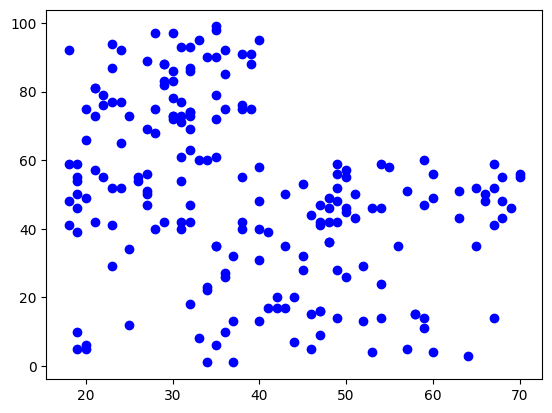

In [43]:
plt.scatter(df['Age'],df['Spending Score (1-100)'],c='b')
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

TypeError: 'str' object is not callable

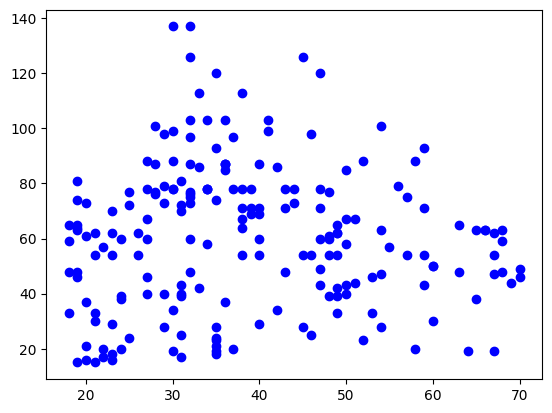

In [ ]:
plt.scatter(df['Age'],df['Annual Income (k$)'],c='b')
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

TypeError: 'str' object is not callable

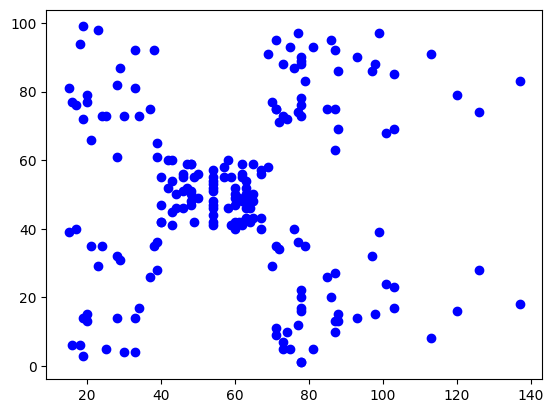

In [ ]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c='b')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()

In [ ]:
rele=['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
cust_df=df[rele]
cust_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
from sklearn.preprocessing import StandardScaler
ab=StandardScaler()
ab.fit(cust_df)

StandardScaler()

In [ ]:
scaleddata=ab.transform(cust_df)
scaleddata

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [ ]:
def find_best_clusters(df,max_k):
    clusters_center = []
    k_values = []

    for k in range(2,max_k):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_center.append(kmeans_model.inertia_)
        k_values.append(k)
    
    return clusters_center,k_values

In [ ]:
clust_cent, k_val =find_best_clusters(scaleddata,12)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

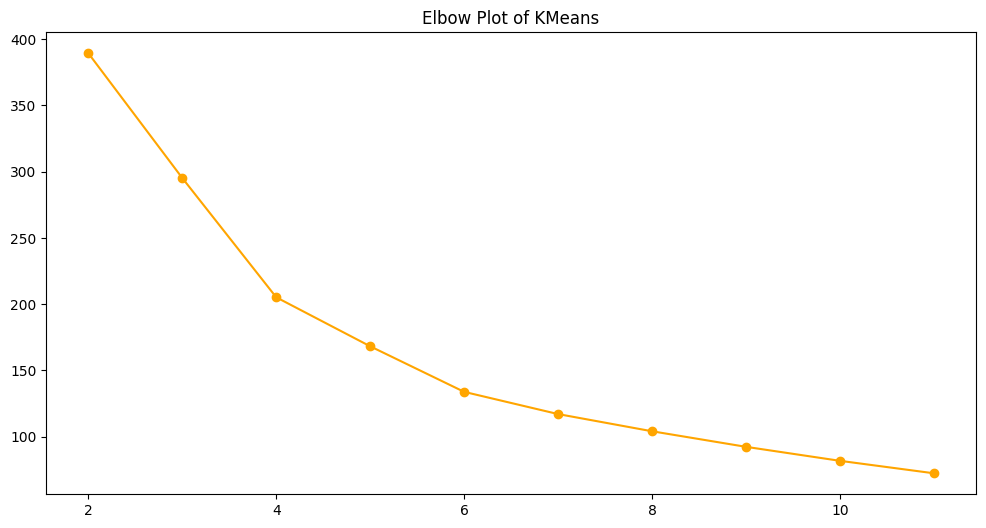

In [ ]:
def gen_elbow_plot(clust_cent,k_val):
    figure=plt.subplots(figsize=(12,6))
    plt.plot(k_val,clust_cent,'o-',color='orange')
    plt.xlabel=('Number of Cluster (K)')
    plt.ylabel=("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()
gen_elbow_plot(clust_cent,k_val)

In [ ]:
kmeans_model=KMeans(n_clusters=7)

In [ ]:
kmeans_model.fit(scaleddata)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=7)

In [ ]:
df['clusters']=kmeans_model.labels_

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,5
196,197,Female,45,126,28,0
197,198,Male,32,126,74,5
198,199,Male,32,137,18,0


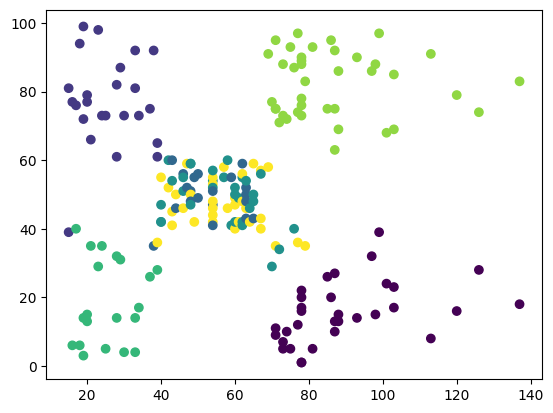

In [ ]:

plt.scatter(df['Annual Income (k$)'],
            df['Spending Score (1-100)'],
            c=df['clusters'])